In [19]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from MyKDTree import KDTree

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


depth=1, L=49.0
depth=2, L=14.5
depth=3, L=35.0
depth=4, L=9.0
depth=5, P=Point(index=2, number=3, x=26, y=5)
depth=5, P=Point(index=1, number=2, x=34, y=13)
depth=4, P=Point(index=5, number=6, x=36, y=12)
depth=3, L=46.0
depth=4, P=Point(index=4, number=5, x=45, y=16)
depth=4, P=Point(index=7, number=8, x=47, y=25)
depth=2, L=26.0
depth=3, L=53.5
depth=4, P=Point(index=6, number=7, x=53, y=19)
depth=4, P=Point(index=0, number=1, x=54, y=22)
depth=3, L=56.5
depth=4, P=Point(index=8, number=9, x=51, y=30)
depth=4, P=Point(index=3, number=4, x=62, y=42)


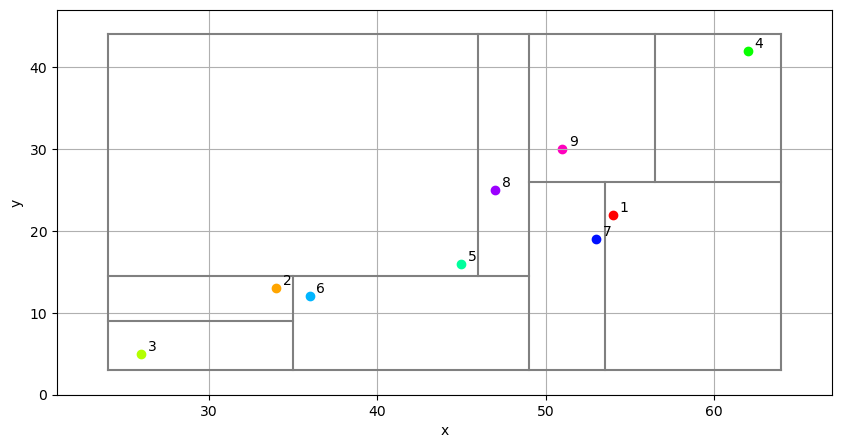

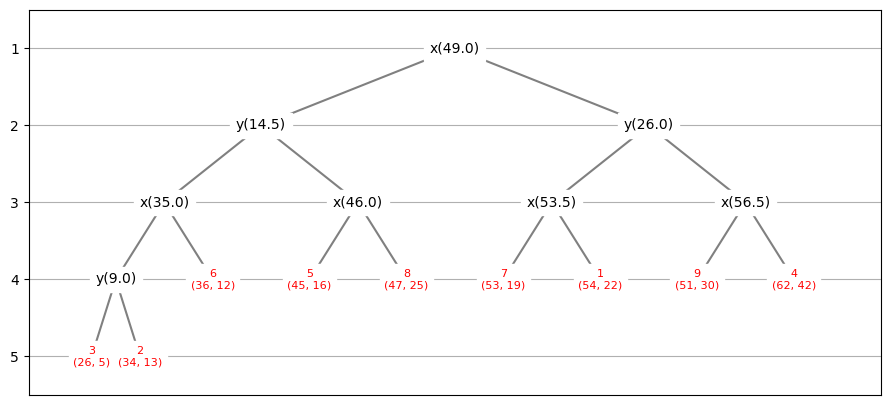

In [23]:
tree = KDTree()

tree.add_point(54, 22)
tree.add_point(34, 13)
tree.add_point(26, 5)
tree.add_point(62, 42)
tree.add_point(45, 16)
tree.add_point(36, 12)
tree.add_point(53, 19)
tree.add_point(47, 25)
tree.add_point(51, 30)

# build the tree
tree.build(split_between=True)

# print three
tree.print()

# draw split
matplotlib.rcParams['figure.figsize'] = [10, 5]
tree.draw_split()

# draw tree
matplotlib.rcParams['figure.figsize'] = [11, 5]
tree.draw_tree()